In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv")

/tmp/ipython-input-4-58795382.py:3: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv")


In [5]:
df_mutated_genes = df.loc[:,["death_from_cancer",'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut','hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut']]

In [6]:
df_mutated_genes.head()

,death_from_cancer,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,Living,0,0,0,0,0,0,0,0,0,0
1,Living,0,0,0,0,0,0,0,0,0,0
2,Died of Disease,0,0,0,0,0,0,0,0,0,0
3,Living,0,0,0,0,0,0,0,0,0,0
4,Died of Disease,0,0,0,0,0,0,0,0,0,0


In [7]:
df_mutated_genes.dtypes

,0
death_from_cancer,object
mtap_mut,object
ppp2cb_mut,object
smarcd1_mut,object
nras_mut,object
ndfip1_mut,object
hras_mut,object
prps2_mut,object
smarcb1_mut,object
stmn2_mut,object


In [8]:
df_mutated_genes.isnull().sum()

,0
death_from_cancer,1
mtap_mut,0
ppp2cb_mut,0
smarcd1_mut,0
nras_mut,0
ndfip1_mut,0
hras_mut,0
prps2_mut,0
smarcb1_mut,0
stmn2_mut,0


In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

In [10]:
x=df_mutated_genes.drop("death_from_cancer",axis=1)

In [11]:
x=pd.get_dummies(columns=x.columns,data=x,dtype=int,drop_first=True)

In [12]:
x.dtypes

,0
mtap_mut_A213S,int64
mtap_mut_A247S,int64
mtap_mut_I138M,int64
mtap_mut_I255L,int64
ppp2cb_mut_G128V,int64
ppp2cb_mut_I224S,int64
ppp2cb_mut_R110C,int64
ppp2cb_mut_R254Q,int64
smarcd1_mut_L434M,int64
smarcd1_mut_M366T,int64


In [13]:
x =x.loc[:,~x.columns.duplicated()].copy()
x.dtypes

,0
mtap_mut_A213S,int64
mtap_mut_A247S,int64
mtap_mut_I138M,int64
mtap_mut_I255L,int64
ppp2cb_mut_G128V,int64
ppp2cb_mut_I224S,int64
ppp2cb_mut_R110C,int64
ppp2cb_mut_R254Q,int64
smarcd1_mut_L434M,int64
smarcd1_mut_M366T,int64


In [14]:
df["death_from_cancer"].fillna("Living",inplace=True)

/tmp/ipython-input-14-30388964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["death_from_cancer"].fillna("Living",inplace=True)


In [15]:
df["death_from_cancer"].value_counts()

,count
death_from_cancer,
Living,802
Died of Disease,622
Died of Other Causes,480


In [16]:
y=df["death_from_cancer"]

In [17]:
best_model = SelectKBest(f_classif, k=4).fit(x,y)

In [18]:
col_bst=best_model.get_support(indices=True)

In [19]:
col_bst
x.iloc[:,col_bst].head()

,hras_mut_0,smarcb1_mut_0,stmn2_mut_N145K,siah1_mut_0
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [20]:
x_new_best=SelectKBest(f_classif, k=4).fit_transform(x,y)

In [21]:
x_new_best.shape

(1904, 4)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
x_scaled =StandardScaler().fit_transform(x_new_best)

In [24]:
x_scaled

array([[-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       [-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       [-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       ...,
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ],
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ],
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ]])

In [25]:
from sklearn.cluster import KMeans

In [26]:
wcss=[]
for i in range(2,6):
  model=KMeans(init="random",n_clusters=i,random_state=100).fit(x_scaled)
  wcss.append(model.inertia_)

In [27]:
wcss

[1923.2199368297872, 20.079763419388605, 12.049372863385996, 8.030275898865238]

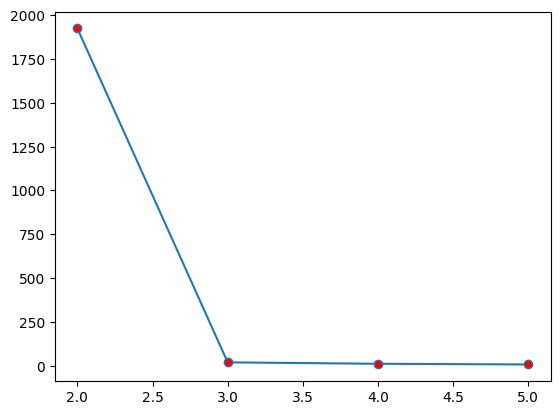

In [28]:
plt.plot(range(2,6),wcss,marker="o",markerfacecolor="red")

In [29]:
kmeans_final=KMeans(n_clusters=2,init="random").fit(x_scaled)

In [30]:
clusters=kmeans_final.predict(x_scaled)
clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [31]:
x["clusters"]=clusters

In [32]:
x["clusters"].value_counts()

,count
clusters,
0,1024
1,880


In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(x_new_best,clusters)

np.float64(0.996067024279685)

In [35]:
x_new=x.iloc[:,col_bst]

In [36]:
x_new["death_from_cancer"]=y

/tmp/ipython-input-36-2572114842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new["death_from_cancer"]=y


In [37]:
x_new["clusters"]=clusters

/tmp/ipython-input-37-3054676701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new["clusters"]=clusters


<Axes: xlabel='clusters', ylabel='count'>

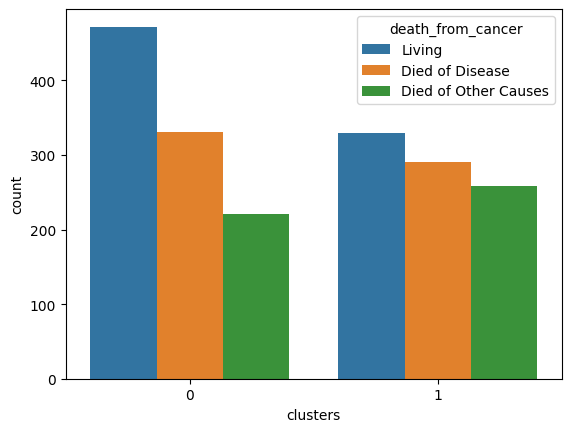

In [38]:
import seaborn as sns

sns.countplot(x="clusters",hue="death_from_cancer",data=x_new)